In [3]:
%cd ../

/Users/ankitbaliyan/Documents/ExtraCurricular/EdYoda/AI-Agent-Development-GENAIMD240525/LangChain_Agent_tools


In [2]:
import os
from langchain.tools import DuckDuckGoSearchRun
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain_openai import AzureChatOpenAI
# from langgraph.prebuilt import create_agent_executor
from langchain_core.pydantic_v1 import BaseModel
from langchain.chains.openai_functions import create_structured_output_runnable
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import Annotated, Any, Dict, Optional, Sequence, TypedDict, List, Tuple
import operator
from langchain_openai.chat_models import ChatOpenAI

/opt/anaconda3/envs/edyoda_ai_agents_env/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3672: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
from model_inference import llm

## Programmer

In [11]:
## Programmer


class Code(BaseModel):
    """Plan to follow in future"""

    code: str = Field(
        description="Detailed optmized error-free Python code on the provided requirements"
    )

from langchain.chains.openai_functions import create_structured_output_runnable
from langchain_core.prompts import ChatPromptTemplate

code_gen_prompt = ChatPromptTemplate.from_template(
    '''**Role**: You are a expert python programmer. You need to develop python code error free and executable python code.
    **Task**: As a programmer, you are required to complete the function. Use a Chain-of-Thought approach to break
    down the problem, create pseudocode, and then write the code in Python language. Ensure that your code is
    efficient, readable, and well-commented.

    **Instructions**:
    1. **Understand and Clarify**: Make sure you understand the task.
    2. **Algorithm/Method Selection**: Decide on the most efficient way.
    3. **Pseudocode Creation**: Write down the steps you will follow in pseudocode.
    4. **Code Generation**: Translate your pseudocode into executable Python code

    *REQURIEMENT*
    {requirement}'''
    )
# coder = create_structured_output_runnable(
#     Code, llm, code_gen_prompt
# )

coder = code_gen_prompt | llm.with_structured_output(Code)

# coder.invoke({"requirement":"Write a function to calculate the factorial of a number using recursion."})
# coder.invoke(requirement="Write a function to calculate the factorial of a number using recursion.")

/opt/anaconda3/envs/edyoda_ai_agents_env/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1672: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


In [12]:
code_ = coder.invoke({'requirement':'Generate fibbinaco series'})

print(code_.code)

def fibonacci_series(n):
    """
    Generate a Fibonacci series up to the n-th term.
    The Fibonacci series is a sequence where each number is the sum of the two preceding ones, usually starting with 0 and 1.
    """
    # Initialize the first two terms of the Fibonacci series
    fib_series = []
    a, b = 0, 1

    # Generate Fibonacci series up to the n-th term
    for _ in range(n):
        fib_series.append(a)  # Append the current term to the series
        a, b = b, a + b  # Update a and b to the next two terms

    return fib_series

# Example usage:
if __name__ == '__main__':
    n_terms = 10  # Specify the number of terms in the Fibonacci series
    print(f"Fibonacci series up to {n_terms} terms:")
    print(fibonacci_series(n_terms))


## Tester

In [13]:
class Test(BaseModel):
    """Plan to follow in future"""

    Input: List[List] = Field(
        description="Input for Test cases to evaluate the provided code"
    )
    Output: List[List] = Field(
        description="Expected Output for Test cases to evaluate the provided code"
    )


from langchain.chains.openai_functions import create_structured_output_runnable
from langchain_core.prompts import ChatPromptTemplate

test_gen_prompt = ChatPromptTemplate.from_template(
    '''**Role**: As a tester, your task is to create Basic and Simple test cases based on provided Requirement and Python Code.
    These test cases should encompass Basic, Edge scenarios to ensure the code's robustness, reliability, and scalability.
    **1. Basic Test Cases**:
    - **Objective**: Basic and Small scale test cases to validate basic functioning
    **2. Edge Test Cases**:
    - **Objective**: To evaluate the function's behavior under extreme or unusual conditions.
    **Instructions**:
    - Implement a comprehensive set of test cases based on requirements.
    - Pay special attention to edge cases as they often reveal hidden bugs.
    - Only Generate Basics and Edge cases which are small
    - Avoid generating Large scale and Medium scale test case. Focus only small, basic test-cases
    *REQURIEMENT*
    {requirement}
    **Code**
    {code}
    '''
    )
# tester_agent = create_structured_output_runnable(
#     Test, llm, test_gen_prompt
# )

tester_agent = test_gen_prompt | llm.with_structured_output(Test)

/opt/anaconda3/envs/edyoda_ai_agents_env/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1672: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


In [14]:
test_ = tester_agent.invoke({'requirement':'Generate fibbinaco series','code':code_.code})

In [16]:
test_

Test(Input=[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]], Output=[[], [0], [0, 1], [0, 1, 1], [0, 1, 1, 2], [0, 1, 1, 2, 3], [0, 1, 1, 2, 3, 5], [0, 1, 1, 2, 3, 5, 8], [0, 1, 1, 2, 3, 5, 8, 13], [0, 1, 1, 2, 3, 5, 8, 13, 21], [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]])

## Executor

In [17]:
class ExecutableCode(BaseModel):
    """Plan to follow in future"""

    code: str = Field(
        description="Detailed optmized error-free Python code with test cases assertion"
    )

python_execution_gen = ChatPromptTemplate.from_template(
    """You have to add testing layer in the *Python Code* that can help to execute the code. You need to pass only Provided Input as argument and validate if the Given Expected Output is matched.
    *Instruction*:
    - Make sure to return the error if the assertion fails
    - Generate the code that can be execute
    Python Code to excecute:
    *Python Code*:{code}
    Input and Output For Code:
    *Input*:{input}
    *Expected Output*:{output}"""
    )
# execution = create_structured_output_runnable(
#     ExecutableCode, llm, python_execution_gen
# )

execution = python_execution_gen | llm.with_structured_output(ExecutableCode)

/opt/anaconda3/envs/edyoda_ai_agents_env/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1672: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


In [18]:
code_execute = execution.invoke({"code":code_.code,"input":test_.Input,'output':test_.Output})

In [20]:
print(code_execute.code)

def fibonacci_series(n):
    """
    Generate a Fibonacci series up to the n-th term.
    The Fibonacci series is a sequence where each number is the sum of the two preceding ones, usually starting with 0 and 1.
    """
    # Initialize the first two terms of the Fibonacci series
    fib_series = []
    a, b = 0, 1

    # Generate Fibonacci series up to the n-th term
    for _ in range(n):
        fib_series.append(a)  # Append the current term to the series
        a, b = b, a + b  # Update a and b to the next two terms

    return fib_series

def test_fibonacci_series():
    inputs = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
    expected_outputs = [[], [0], [0, 1], [0, 1, 1], [0, 1, 1, 2], [0, 1, 1, 2, 3], [0, 1, 1, 2, 3, 5], [0, 1, 1, 2, 3, 5, 8], [0, 1, 1, 2, 3, 5, 8, 13], [0, 1, 1, 2, 3, 5, 8, 13, 21], [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]]

    for i, n in enumerate(inputs):
        result = fibonacci_series(n[0])
        assert result == expected_outputs[i], f'Error: 

In [21]:
error = None
try:
    exec(code_execute.code)
except Exception as e:
    error = f'Exception : {e}'
error

All tests passed!


## Debugger

In [22]:
class RefineCode(BaseModel):

    code: str = Field(
        description="Optimized and Refined Python code to resolve the error"
    )


python_refine_gen = ChatPromptTemplate.from_template(
    """You are expert in Python Debugging. You have to analysis Given Code and Error and generate code that handles the error
    *Instructions*:
    - Make sure to generate error free code
    - Generated code is able to handle the error

    *Code*: {code}
    *Error*: {error}
    """
)
# refine_code = create_structured_output_runnable(
#     RefineCode, llm, python_refine_gen
# )

refine_code = python_refine_gen | llm.with_structured_output(RefineCode)

/opt/anaconda3/envs/edyoda_ai_agents_env/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1672: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


In [23]:
refined_code = refine_code.invoke({"code":code_execute.code,"error":error})

In [26]:
# print(refined_code.code)

## Building Graph

In [27]:
class AgentCoder(TypedDict):
    requirement: str
    code: str
    tests: Dict[str, any]
    errors: Optional[str]

In [35]:
def programmer(state):
    print(f'Entering in Programmer')
    requirement = state['requirement']
    code_ = coder.invoke({'requirement':requirement})
    return {'code':code_.code}

def debugger(state):
    print(f'Entering in Debugger')
    errors = state['errors']
    code = state['code']
    refine_code_ = refine_code.invoke({'code':code,'error':errors})
    return {'code':refine_code_.code,'errors':None}

def executer(state):
    print(f'Entering in Executer')
    tests = state['tests']
    input_ = tests['input']
    output_ = tests['output']
    code = state['code']
    executable_code = execution.invoke({"code":code,"input":input_,'output':output_})
    error = None
    try:
        exec(executable_code.code)
        print("Code Execution Successful")
    except Exception as e:
        print('Found Error While Running')
        error = f"Execution Error : {e}"
    return {'code':executable_code.code,'errors':error}

def tester(state):
    print(f'Entering in Tester')
    requirement = state['requirement']
    code = state['code']
    tests = tester_agent.invoke({'requirement':requirement,'code':code})
    print(f'Test Cases Generated: {tests}')
    return {'tests':{'input':tests.Input,'output':tests.Output}}

def decide_to_end(state):
    print(f'Entering in Decide to End')
    if state['errors']:
        return 'debugger'
    else:
        return 'end'

In [36]:
from langgraph.graph import END, StateGraph

workflow = StateGraph(AgentCoder)

# Define the nodes
workflow.add_node("programmer", programmer)
workflow.add_node("debugger", debugger)
workflow.add_node("executer", executer)
workflow.add_node("tester", tester)
#workflow.add_node('decide_to_end',decide_to_end)

# Build graph
workflow.set_entry_point("programmer")
workflow.add_edge("programmer", "tester")
workflow.add_edge("debugger", "executer")
workflow.add_edge("tester", "executer")
#workflow.add_edge("executer", "decide_to_end")

workflow.add_conditional_edges(
    "executer",
    decide_to_end,
    {
        "end": END,
        "debugger": "debugger",
    },
)

# Compile
app = workflow.compile()

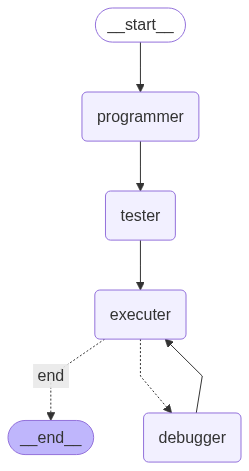

In [50]:
from IPython.display import Image, display

# display(Image(app.get_graph().draw_png()))
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
# requirement = """Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
# You may assume that each input would have exactly one solution, and you may not use the same element twice.You can return the answer in any order."""

requirement = "Write a function to calculate the factorial of a number using recursion."


In [45]:
from langchain_core.messages import HumanMessage

config = {"recursion_limit": 15}
inputs = {"requirement": requirement}
running_dict = {}

async for event in app.astream(inputs, config=config):
    for k, v in event.items():
        running_dict[k] = v
        if k != "__end__":
            print(v)
            print('----------'*20)

Entering in Programmer
{'code': 'def factorial(n):\n    """\n    Calculate the factorial of a number using recursion.\n\n    Parameters:\n    n (int): The number to calculate the factorial for. Must be a non-negative integer.\n\n    Returns:\n    int: The factorial of the number n.\n    """\n    # Base case: factorial of 0 is 1\n    if n == 0:\n        return 1\n    # Recursive case: n! = n * (n-1)!\n    else:\n        return n * factorial(n - 1)\n\n# Example usage:\nif __name__ == \'__main__\':\n    number = 5\n    print(f"The factorial of {number} is {factorial(number)}")'}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Entering in Tester
Test Cases Generated: Input=[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]] Output=[[1], [1], [2], [6], [24], [120], [720], [5040], [40320], [362880], [3628800]]
{'tests': {'input': [[0], 

In [62]:
# print(running_dict['programmer']['code'])  # Final Code Generated by Programmer

In [63]:
# print(v['code'])

In [61]:
## first code generated by programmer

def factorial(n):
    """
    Calculate the factorial of a number using recursion.

    Parameters:
    n (int): The number to calculate the factorial for. Must be a non-negative integer.

    Returns:
    int: The factorial of the number n.
    """
    # Base case: factorial of 0 is 1
    if n == 0:
        return 1
    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial(n - 1)

# Testing layer
if __name__ == '__main__':
    inputs = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
    expected_outputs = [[1], [1], [2], [6], [24], [120], [720], [5040], [40320], [362880], [3628800]]
    for i, input_value in enumerate(inputs):
        try:
            result = factorial(*input_value)
            assert result == expected_outputs[i][0], f'Error: for input {input_value}, expected {expected_outputs[i][0]} but got {result}'
        except ValueError as e:
            print(f'ValueError: {e}')
        except Exception as e:
            print(f'Unexpected error: {e}')
    print('All tests completed!')

All tests completed!


In [59]:
# final response from the agent


def factorial(n):
    """
    Calculate the factorial of a number using recursion.

    Parameters:
    n (int): The number to calculate the factorial for. Must be a non-negative integer.

    Returns:
    int: The factorial of the number n.
    """
    # Base case: factorial of 0 is 1
    if n < 0:
        raise ValueError('Input must be a non-negative integer.')
    if n == 0:
        return 1
    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial(n - 1)

# Testing layer
if __name__ == '__main__':
    inputs = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
    expected_outputs = [[1], [1], [2], [6], [24], [120], [720], [5040], [40320], [362880], [3628800]]
    for i, input_value in enumerate(inputs):
        try:
            result = factorial(*input_value)
            assert result == expected_outputs[i][0], f'Error: for input {input_value}, expected {expected_outputs[i][0]} but got {result}'
        except ValueError as e:
            print(f'ValueError: {e}')
        except Exception as e:
            print(f'Unexpected error: {e}')
    print('All tests completed!')

All tests completed!
